In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

heart = pd.read_csv('data/heart.csv')
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

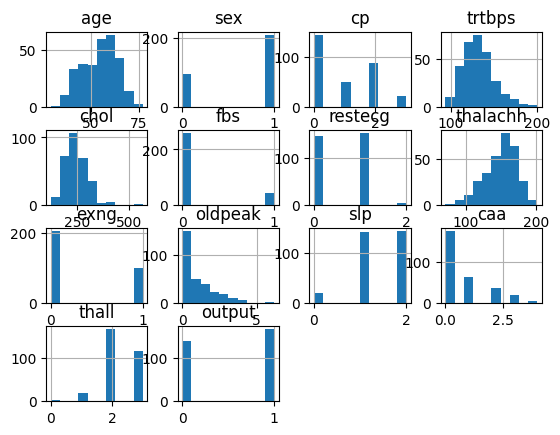

In [7]:
heart.hist()

## 基礎作法

In [10]:
from sklearn.model_selection import train_test_split
X = heart.drop('output', axis=1)
y = heart['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='max') #最大值正規化，讓每個欄位的數值都在0-1之間
train_normalizer_heart = normalizer.transform(X_train)
test_normalizer_heart = normalizer.transform(X_test)
train_normalizer_heart

C:\Users\eric0\anaconda3\envs\kaggle\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but Normalizer was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
C:\Users\eric0\anaconda3\envs\kaggle\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but Normalizer was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([[0.14237288, 0.00338983, 0.00338983, ..., 0.00677966, 0.        ,
        0.00677966],
       [0.21481481, 0.0037037 , 0.        , ..., 0.00740741, 0.        ,
        0.01111111],
       [0.1991342 , 0.004329  , 0.00865801, ..., 0.004329  , 0.        ,
        0.00865801],
       ...,
       [0.29487179, 0.0042735 , 0.01282051, ..., 0.0042735 , 0.0042735 ,
        0.00854701],
       [0.18473896, 0.00401606, 0.        , ..., 0.00803213, 0.        ,
        0.01204819],
       [0.32307692, 0.        , 0.00512821, ..., 0.01025641, 0.01025641,
        0.01025641]])

In [32]:
from xgboost import XGBClassifier
from hyperopt import hp, fmin, tpe, Trials
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score

space = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),  
    'max_depth': hp.quniform('max_depth', 3, 20, 1),  
    'min_child_weight': hp.quniform('min_child_weight', 1, 20, 1),  
    'n_estimators': hp.quniform('n_estimators', 50, 200, 1),  
}

def objective(params):
    model = XGBClassifier(
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        min_child_weight=int(params['min_child_weight']),
        n_estimators=int(params['n_estimators']),
    )
    model.fit(train_normalizer_heart, y_train)
    y_val_pred = model.predict(test_normalizer_heart)
    pr = average_precision_score(y_test, y_val_pred)
    return 1 - pr

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=300, trials=trials)

print("Best hyperparameters:", best)

100%|█| 300/300 [00:19<00:00, 15.78trial/s, best loss: 0.11494038
Best hyperparameters: {'learning_rate': 0.02017400034857993, 'max_depth': 17.0, 'min_child_weight': 19.0, 'n_estimators': 155.0}


In [34]:
best_xgb = XGBClassifier(
        learning_rate=best['learning_rate'],
        max_depth=int(best['max_depth']),
        min_child_weight=int(best['min_child_weight']),
        n_estimators=int(best['n_estimators'])
    )
best_xgb.fit(train_normalizer_heart, y_train)
y_pred = best_xgb.predict(test_normalizer_heart)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'Precision: {precision_score(y_test, y_pred):.2f}')
print(f'Recall: {recall_score(y_test, y_pred):.2f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.2f}')

Accuracy: 0.92
Precision: 0.91
Recall: 0.94
F1 Score: 0.92


## 優化做法
* 單純one hot encoder 可能不夠
* 正規化後仍然不理想

In [22]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

heart = pd.read_csv('data/heart.csv')

encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(heart[['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']))

oneHotEncodHeart = pd.concat([heart.drop(['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall'], axis=1), encoded_df], axis=1)
X_oneHotEncodHeart = oneHotEncodHeart.drop('output', axis=1)
y_oneHotEncodHeart = oneHotEncodHeart['output']
X_oneHotEncodHeart

,age,trtbps,chol,thalachh,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,37,130,250,187,3.5,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,41,130,204,172,1.4,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,56,120,236,178,0.8,0.0,1.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,57,120,354,163,0.6,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
299,45,110,264,132,1.2,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300,68,144,193,141,3.4,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
301,57,130,131,115,1.2,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### 新增資料正規化處理

In [31]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer(norm='max') 
X_encoder_norm = normalizer.transform(X_oneHotEncodHeart)
X_encoder_norm

/Users/cfh00893252/anaconda3/envs/xgboost/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


array([[0.27038627, 0.6223176 , 1.        , ..., 0.00429185, 0.        ,
        0.        ],
       [0.148     , 0.52      , 1.        , ..., 0.        , 0.004     ,
        0.        ],
       [0.20098039, 0.6372549 , 1.        , ..., 0.        , 0.00490196,
        0.        ],
       ...,
       [0.35233161, 0.74611399, 1.        , ..., 0.        , 0.        ,
        0.00518135],
       [0.4351145 , 0.99236641, 1.        , ..., 0.        , 0.        ,
        0.00763359],
       [0.24152542, 0.55084746, 1.        , ..., 0.        , 0.00423729,
        0.        ]])

In [24]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from hyperopt import hp, fmin, tpe, Trials
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, average_precision_score

space = {
    'learning_rate': hp.loguniform('learning_rate', -5, 0),  
    'max_depth': hp.quniform('max_depth', 3, 50, 1),  
    'min_child_weight': hp.quniform('min_child_weight', 1, 50, 1),  
    'n_estimators': hp.quniform('n_estimators', 50, 200, 1),  
}



def objective(params):
    model = XGBClassifier(
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        min_child_weight=int(params['min_child_weight']),
        n_estimators=int(params['n_estimators']),
    )
    
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    pr_auc = []
    
    for train_index, val_index in skf.split(X_encoder_norm, y_oneHotEncodHeart):
        X_train, X_val = X_encoder_norm[train_index], X_encoder_norm[val_index]
        y_train, y_val = y_oneHotEncodHeart.iloc[train_index], y_oneHotEncodHeart.iloc[val_index]

        model.fit(X_train, y_train)  # 訓練模型
        y_pred = model.predict(X_val)  # 在驗證集上進行預測
        pr = average_precision_score(y_val, y_pred)  # 計算準確度
        pr_auc.append(pr)
    
    return 1 - np.mean(pr_auc)

trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=300, trials=trials)

print("Best hyperparameters:", best)

100%|█| 300/300 [00:49<00:00,  6.07trial/s, best loss: 0.16082015
Best hyperparameters: {'learning_rate': 0.08118261466848399, 'max_depth': 30.0, 'min_child_weight': 8.0, 'n_estimators': 126.0}


In [35]:
best_xgb = XGBClassifier(
        learning_rate=best['learning_rate'],
        max_depth=int(best['max_depth']),
        min_child_weight=int(best['min_child_weight']),
        n_estimators=int(best['n_estimators'])
    )

skf = StratifiedKFold(n_splits=5, shuffle=True)

pr_auc = []
accs_score = []
f1s_score = []

for train_index, val_index in skf.split(X_encoder_norm, y_oneHotEncodHeart):
    X_train, X_val = X_encoder_norm[train_index], X_encoder_norm[val_index]
    y_train, y_val = y_oneHotEncodHeart.iloc[train_index], y_oneHotEncodHeart.iloc[val_index]

    best_xgb.fit(X_train, y_train)  # 訓練模型
    y_pred = best_xgb.predict(X_val)  # 在驗證集上進行預測
    pr = average_precision_score(y_val, y_pred)  # 計算準確度
    pr_auc.append(pr)
    
    acc = accuracy_score(y_val, y_pred)
    accs_score.append(acc)
    
    f1 = f1_score(y_val, y_pred)
    f1s_score.append(f1)

print(f'Accuracy: {np.mean(accs_score):.2f}')
print(f'Precision & Recall: {np.mean(pr_auc):.2f}')
print(f'F1 Score: {np.mean(f1s_score):.2f}')

Accuracy: 0.84
Precision & Recall: 0.81
F1 Score: 0.85


### 沒有正規化的結果
* Accuracy: 0.85
* Precision & Recall: 0.82
* F1 Score: 0.87

### 正規化後的結果
* Accuracy: 0.84
* Precision & Recall: 0.81
* F1 Score: 0.85

# kaggle上最佳做法

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data/heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
cont_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

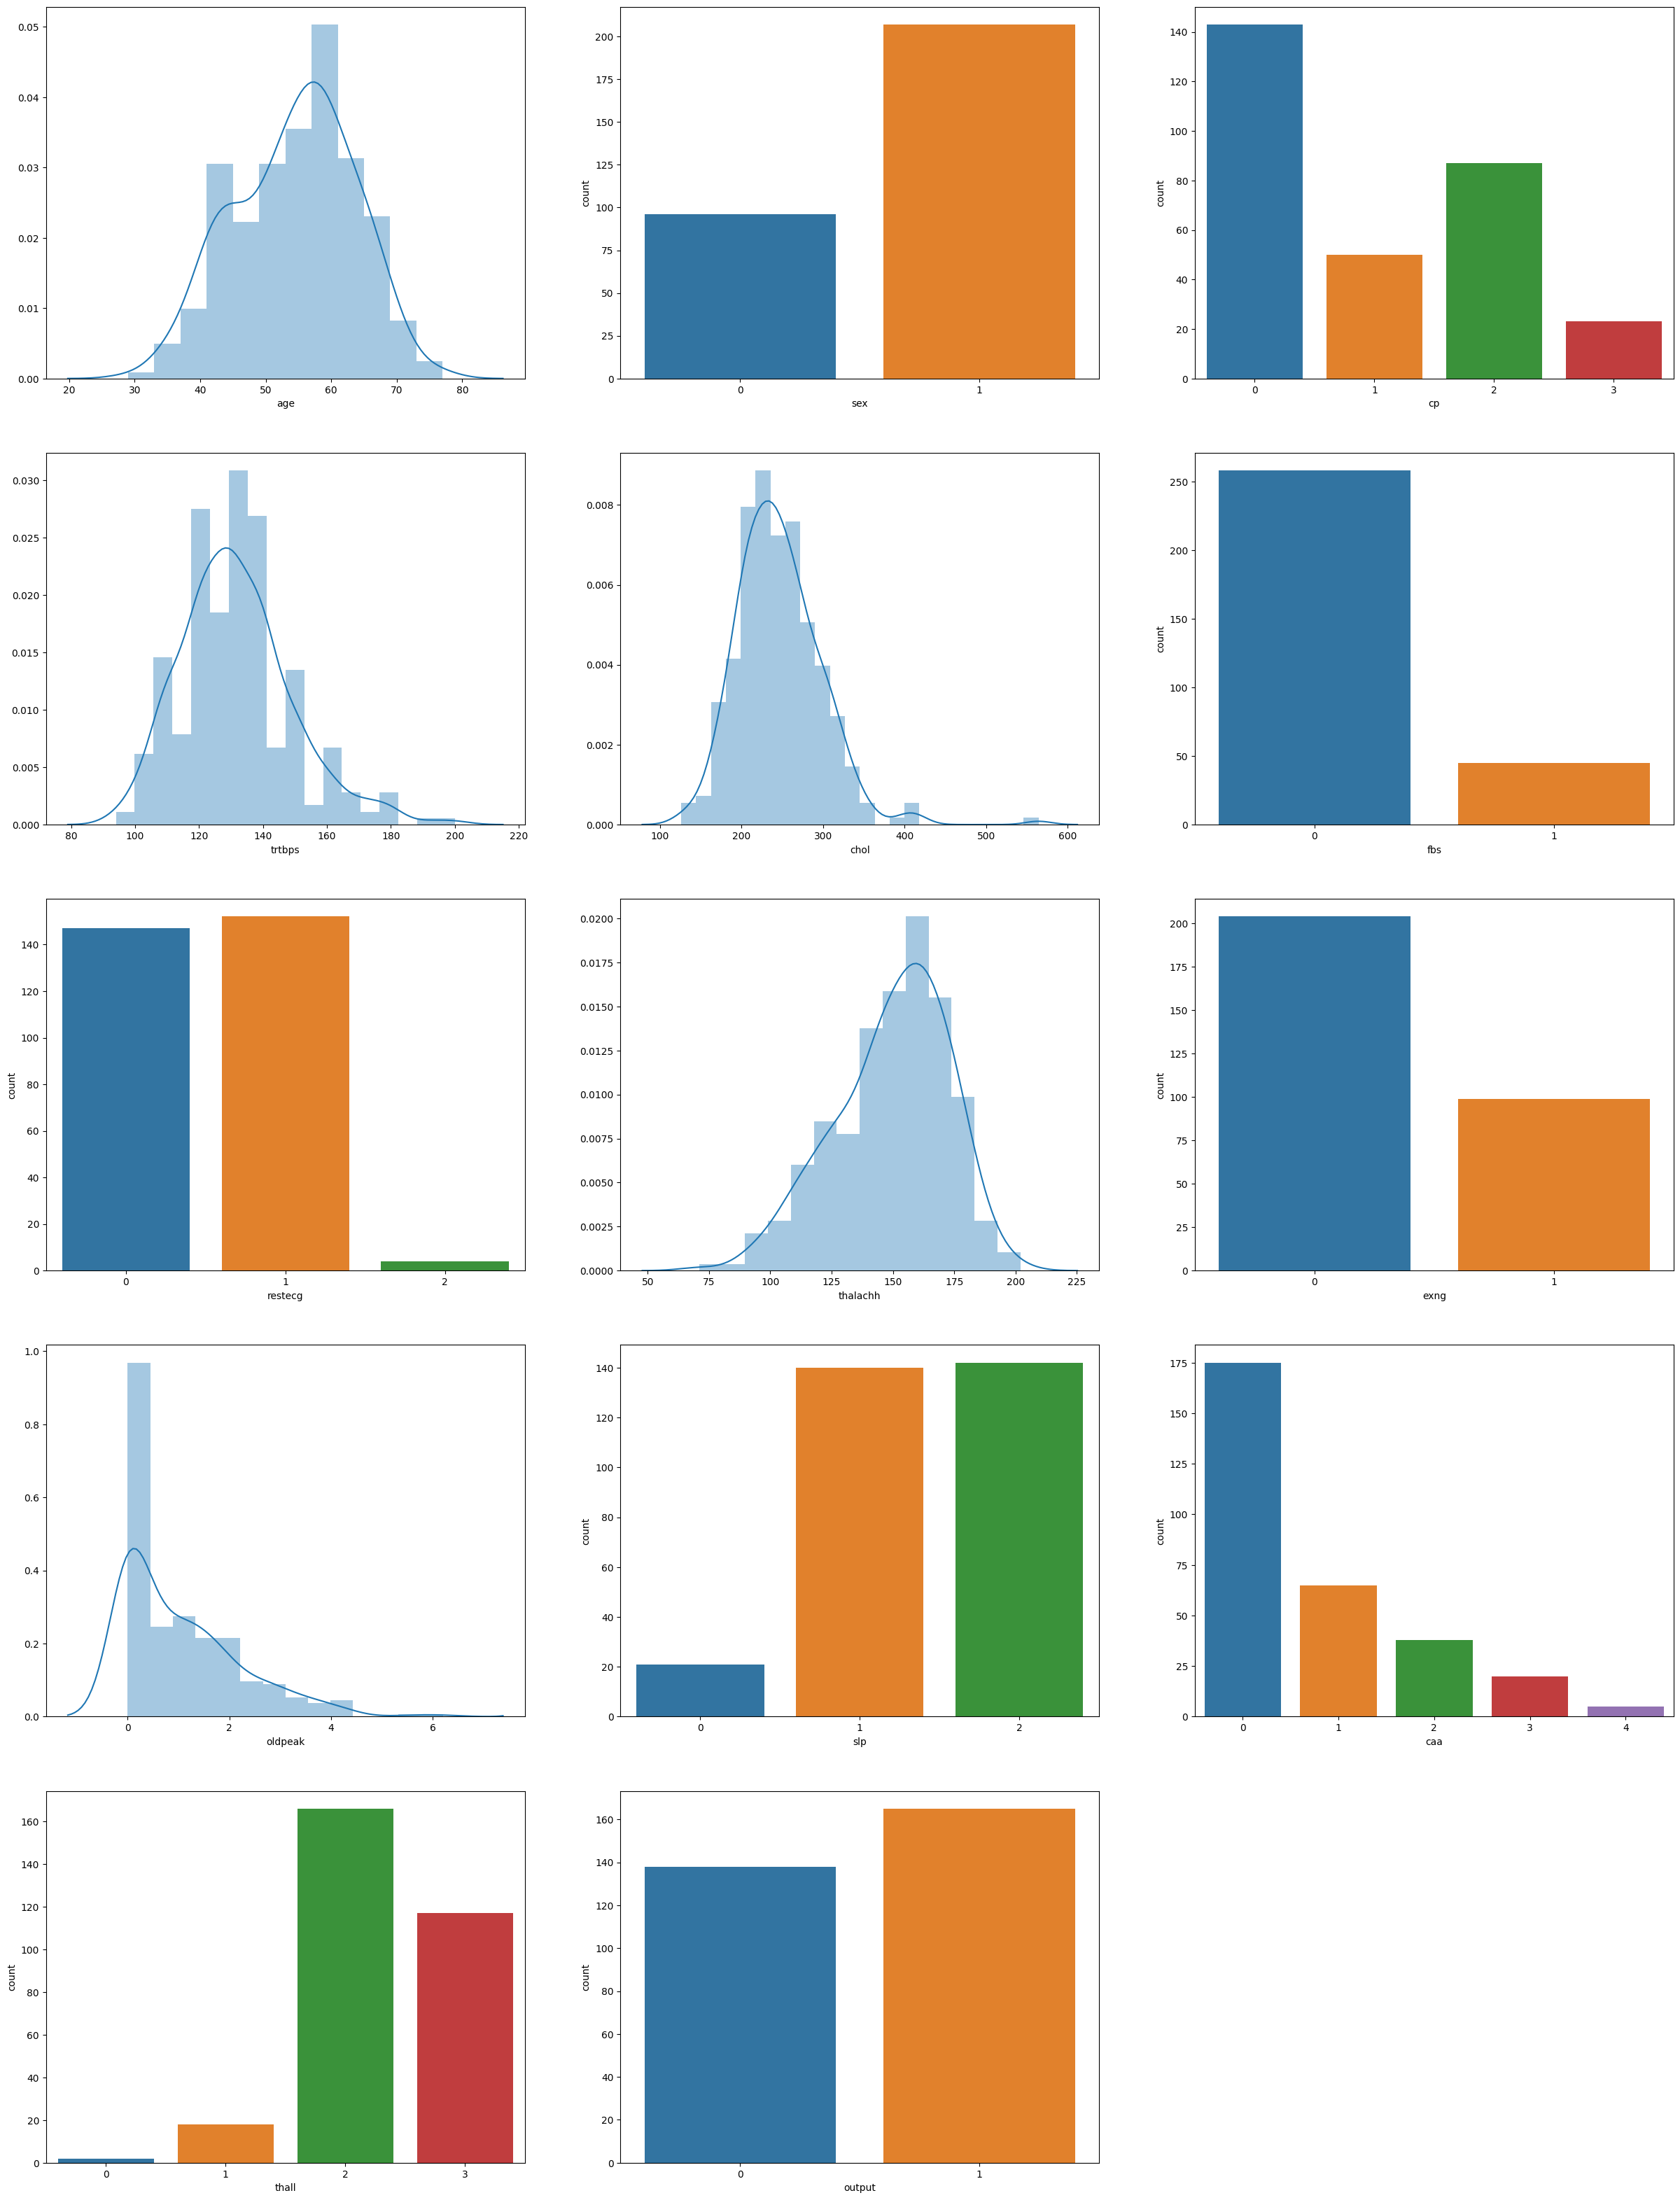

In [27]:
fig, ax = plt.subplots(ncols = 3, nrows = 5, figsize = (30, 40))
index = 0
ax = ax.flatten()

for col in list(df.columns):
    if col in cat_cols:
        sns.countplot(data=df, x=col, ax=ax[index])
        index += 1
    else:
        sns.distplot(df[col], ax=ax[index])
        index += 1
fig.delaxes(ax[14])
plt.draw()

<AxesSubplot:>

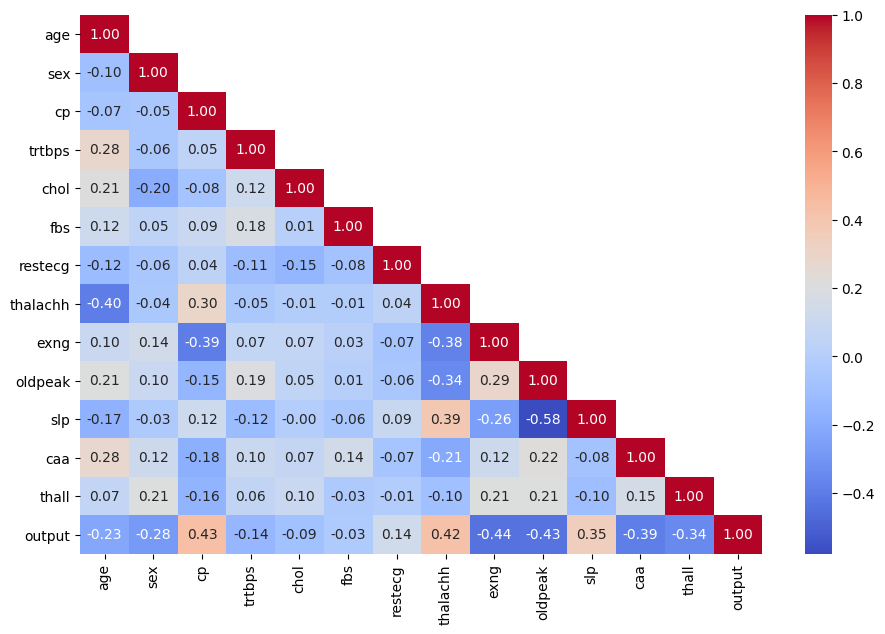

In [16]:

hmap_mask = np.triu(df.corr(), k=1)
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(), mask=hmap_mask, annot = True, fmt=".2f", cmap='coolwarm')

In [25]:
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score

X = df.drop('output', axis = 1)
y = df.iloc[:,-1:]

st_scaler = StandardScaler()
X_norm=X.copy()
X_norm[cont_cols]=pd.DataFrame(st_scaler.fit_transform(X_norm[cont_cols]), columns=[cont_cols])

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 65)

X_norm.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2


In [26]:
from xgboost import XGBClassifier

#Creating model object
model_xgb = XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=25)

#Training the model
model_xgb.fit(X_train, y_train)

#Prediction
y_xgb = model_xgb.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_xgb):.2f}')
print(f'Precision: {precision_score(y_test, y_xgb):.2f}')
print(f'Recall: {recall_score(y_test, y_xgb):.2f}')
print(f'F1 Score: {f1_score(y_test, y_xgb):.2f}')

Accuracy: 0.95
Precision: 0.97
Recall: 0.94
F1 Score: 0.95
